In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv("athlete_events.csv")

In [ ]:
df.head()

In [5]:
df.shape

(271116, 15)

In [ ]:
df.isnull().sum()

In [8]:
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Height"].fillna(df["Height"].mean(), inplace=True)
df["Weight"].fillna(df["Weight"].mean(), inplace=True)

In [10]:
df['Medal'] = df['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [13]:
df = df.drop(["ID", "Name", "Games"], axis=1)

In [ ]:
df.head()
df.head()

In [ ]:
df.info()

In [16]:
df = df.drop("Team", axis=1)

In [19]:
def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [21]:
cols = ["Sex", "NOC", "Season", "City", "Sport", "Event"]

In [ ]:
for col in cols:
    df[col] = label_encoder(df[col])

In [ ]:
df.head()

In [24]:
to_num = ["Age", "Height", "Weight"]

In [27]:
for col in to_num:
    df[col] = df[col].astype("int64")

In [29]:
X = df.drop("Medal", axis=1)
y = df["Medal"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4242)

In [33]:
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [34]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [36]:
y_pred = rf_model.predict(X_test_scaled)

In [37]:
accuracy_score(y_test, y_pred)

0.9022315116493514

In [38]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot: >

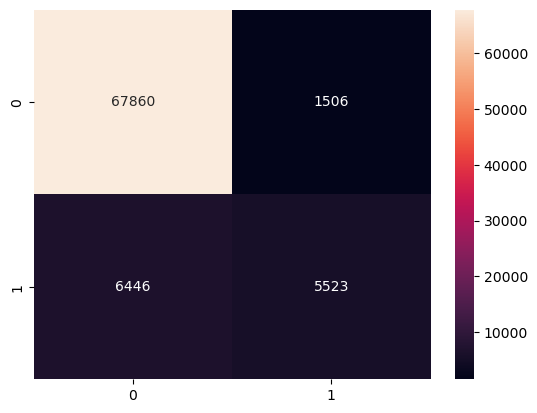

In [39]:
sns.heatmap(cm, annot=True, fmt=".0f")

In [40]:
pickle.dump(rf_model, open("rf.pkl", "wb"))